# test code notebook

In [38]:
def get_ytw():
    import nb_credit_spread as cslibrary
    from statsmodels.tsa.arima.model import ARIMA

    cslib = cslibrary.creditspread()
    start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'

    ytw = cslib.get_ytw_from_date_delta(start=start_date)
    return ytw

In [46]:
import numpy as np
df = get_ytw()

mat = ['3MO', '1YR', '5YR']
rating = ['Aaa', 'Aa', 'A', 'Baa']

for m in mat:
    for r in rating:
        s = f"CS-{r}-{m}"
        print(s)
        df[f"{s}-diff"] = df[f"{s}"].diff(periods=1)
        df[f"{s}-log"] = np.log(df[s])
        df[f"{s}-log-diff"] = df[f"{s}-log"].diff(periods=1)
        df[f"{s}-log-exp"] = np.exp(df[f"{s}-log"])
        assert df[f"{s}-log"].count() == 127

# if df[f"{col}-log"].count() < 127:
#    raise AssertionError("number of ")

CS-Aaa-3MO
CS-Aa-3MO
CS-A-3MO
CS-Baa-3MO
CS-Aaa-1YR
CS-Aa-1YR
CS-A-1YR
CS-Baa-1YR
CS-Aaa-5YR
CS-Aa-5YR
CS-A-5YR
CS-Baa-5YR


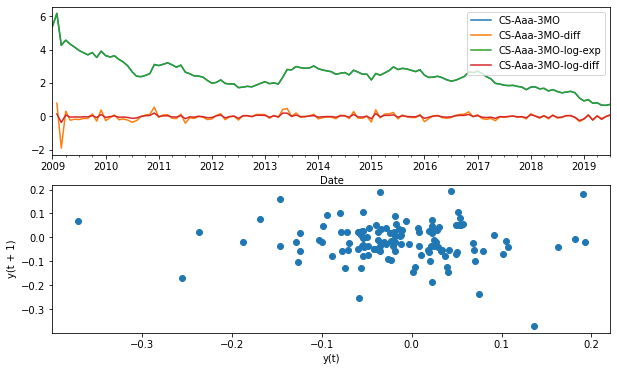

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
# ds = get_ytw()[ ['CS-Aaa-3MO', 'CS-Aa-1YR', 'CS-A-3MO', 'CS-Baa-3MO'] ]
# 'Econ-DSPIC96', 'Econ-CPIAUCSL', 'Econ-CPILFESL', 'Econ-INDPRO', 'Econ-PCE', 'Econ-UNRATE'
# 'Market-RMRF'

s, s_diff, s_log, exp, log_diff = 'CS-Aaa-3MO', 'CS-Aaa-3MO-diff', 'CS-Aaa-3MO-log', 'CS-Aaa-3MO-log-exp', 'CS-Aaa-3MO-log-diff'
ds = df[ [s, s_diff, exp, log_diff] ]
ds.plot(ax=ax1)
pd.plotting.lag_plot(ds[log_diff])
plt.show()